<font color="green">*recommend an employee for promotion.*</font>

# Topic : Employee Recommender system

#

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Recommend whether  the employee  should be promoted based on the given model HR factors.


### b) Defining the Metric for Success

1.Build a model that recommends whether or not the should be promoted with accuracy score above 90 % 

### c) Understanding the context 

A Kenyan company, Simba Deliveries, has 9 departments across the company. The company HR department usually has a hard task identifying the right staff to be considered for various promotions within the company. The promotions are usually only for the manager position and below. The current process they are following is:

1.	Identify the set of staff liable for promotion based on past performance or recommendations
2.	Chosen staff are taken through separate trainings programs and evaluations based on the skills that are required
3.	In light of different factors such as program and training performance, KPI completion (only employees with KPIs > 80% are considered) and such, the chosen staff are considered for promotion.

Given the long procedure for evaluation of a promotion candidate, there are huge delays in facilitating the transition to their new roles.


Build a model that recommends whether or not the should be promoted.



### d) Recording the Experimental Design

* Data preparation
* Data analysis
* Data modeling




### e) Data Relevance

* The provided data was appropriate for the classification analysis that was needed.

## 2. Reading the Data

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Loading the Data from the source i.e. csv
# ---
df0 = pd.read_csv('test_2umaH9m.csv')
df0.head()
#

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [10]:
#loading the train dataset
df1 = pd.read_csv('train_LZdllcl.csv')
df1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
df1['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64



## 3. Checking the Data

In [12]:
# Determining the no. of records in our dataset
#
#dataset information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [14]:
# Checking whether each column has an appropriate datatype
#
df1.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [15]:
df0.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [16]:
#checking for unique values in every column
df1.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [17]:
df0.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

In [18]:
for column in df1.columns:
  print(column)
  print(df1[column].nunique())
  print(df1[column].unique())
  print("----------------------------------------------------------------")
  

employee_id
54808
[65438 65141  7513 ... 13918 13614 51526]
----------------------------------------------------------------
department
9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
----------------------------------------------------------------
region
34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
----------------------------------------------------------------
education
3
["Master's & above" "Bachelor's" nan 'Below Secondary']
----------------------------------------------------------------
gender
2
['f' 'm']
------------------------------------------------------------

In [15]:
for col in df0:
  print(col)
  print(df0[col].nunique())
  print(df0[col].unique())
  print("---------------------------------------------------------")

employee_id
23490
[ 8724 74430 72255 ... 45409  1186  5973]
---------------------------------------------------------
department
9
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
---------------------------------------------------------
region
34
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'region_22' 'region_16' 'region_17' 'region_24' 'region_11' 'region_27'
 'region_9' 'region_20' 'region_34' 'region_23' 'region_8' 'region_14'
 'region_31' 'region_19' 'region_5' 'region_28' 'region_15' 'region_3'
 'region_25' 'region_12' 'region_21' 'region_30' 'region_10' 'region_33'
 'region_32' 'region_6' 'region_1' 'region_18']
---------------------------------------------------------
education
3
["Bachelor's" "Master's & above" nan 'Below Secondary']
---------------------------------------------------------
gender
2
['m' 'f']
---------------------------------------------------------
recruitment_channel
3
['sourci

## 4. External Data Source Validation

### a.Validation

HR datasets:

* (https://www.youtube.com/watch?v=iIO09kGSRkI)

* (https://www.youtube.com/watch?v=XR4nOMp_bGA)

## 5. Tidying the Dataset

In [134]:
# Checking for Outliers
#

In [19]:
# Checking for Anomalies
#
#finding and summing the toatal duplicates in rows
sum(df1.duplicated())

0

In [46]:
#checking for duplicates in the test data
#
sum(df0.duplicated())

0

In [20]:
# Identifying the Missing Data
#
#sum of missing values in every column
df1.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
df0.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [22]:
#dropping rows with null values
#---
df1= df1.dropna()

#crosschecking if the null values have been dropped
#---
df1.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [23]:
#dropping rows with null values
#---
df0= df0.dropna()

#crosschecking if the null values have been dropped
#---
df0.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [140]:
#converting the sex column to lowercase
#df['sex']=df['sex'].str.lower()
#df['sex'].head()

## Checking for outliers

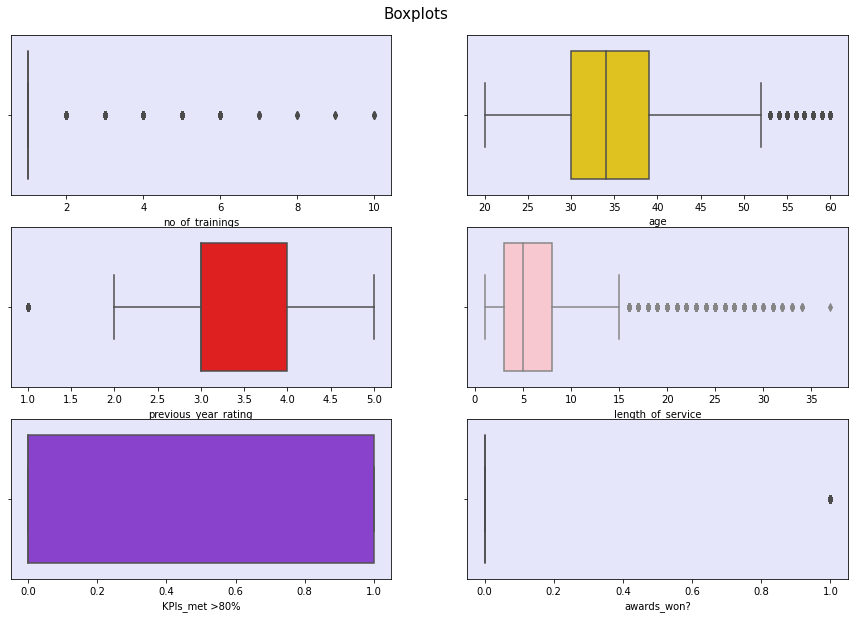

In [24]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']

colors = ['limegreen', 'gold', 'red', 'pink', 'blueviolet','darkorange']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df1, col_list, colors):
  sns.boxplot(df1[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

## 6. Exploratory Analysis

##  Univariate Analysis

In [142]:
df1.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [143]:
#Checking the basic data statistics
df1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [25]:
#get numerical columns for analysis
numer_cols=df1._get_numeric_data().columns
numer_cols

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

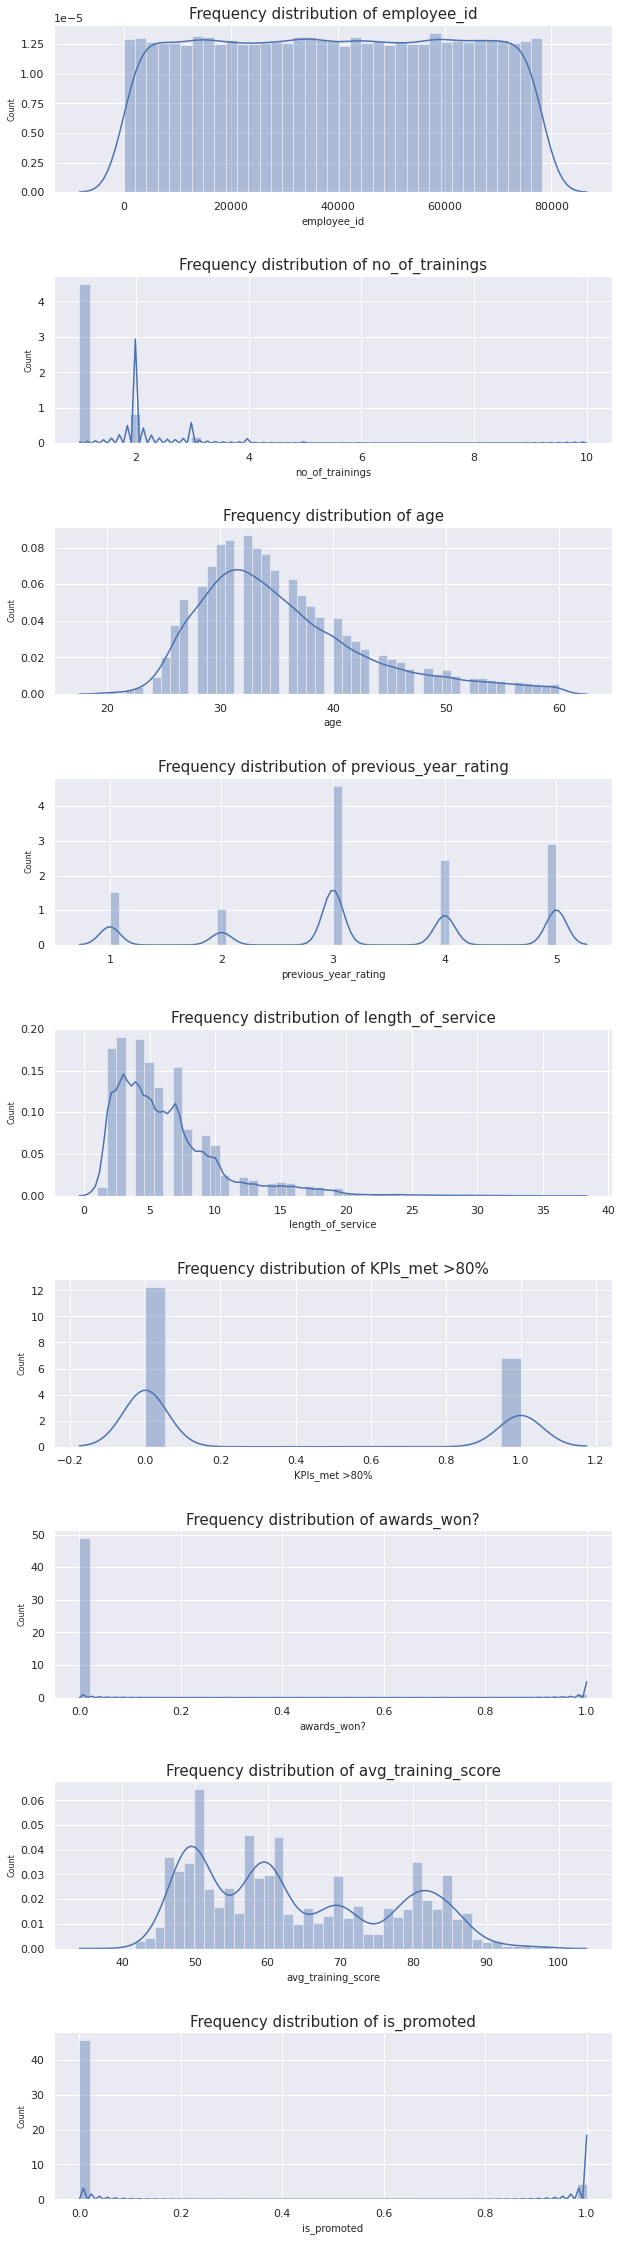

In [145]:
# distribution of numerical variables.

fig, ax = plt.subplots(len(numer_cols), figsize=(10,40))
fig.subplots_adjust(hspace=.5)

for i, col_val in enumerate(numer_cols):
  sns.distplot(df1[col_val], hist=True, ax=ax[i])
  ax[i].set_title('Frequency distribution of '+col_val, fontsize=15)
  ax[i].set_xlabel(col_val, fontsize=10)
  ax[i].set_ylabel('Count', fontsize=8)    

plt.show()

### **Observations**
* Length of service worked was skewed to the right ;- majority of the employees were in service for 1-7 years
* average training score has a multimodal distribution ;- majority of the scores that kept repeating themselves were 50, 60, 70 and 80
* majority of the employee were in the 30 -40 years age bracket

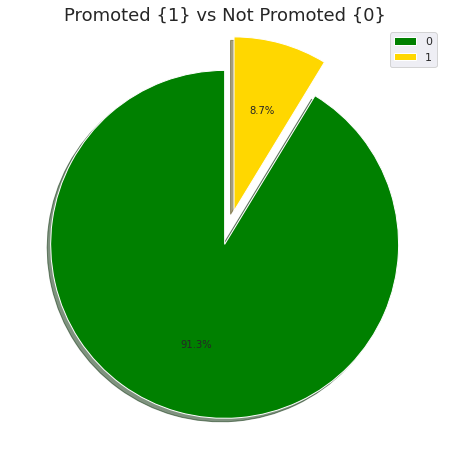

In [146]:
# pie chart on promoted vs not promoted
# ---
promo=df1['is_promoted'].value_counts()
labels = [promo.index[0], promo.index[1]]
colors = ['green', 'gold']
sizes = [promo[0],promo[1]]
explode =(0,0.2)
fig, ax1 = plt.subplots(figsize = (15,8))
ax1.pie(sizes,colors= colors,explode= explode, autopct='%.1f%%',shadow=True, startangle=90);
plt.title("Promoted {1} vs Not Promoted {0}", fontsize = 18)
ax1.legend(labels, loc = "upper right")
plt.show()

- only 8.7% of the population was promoted

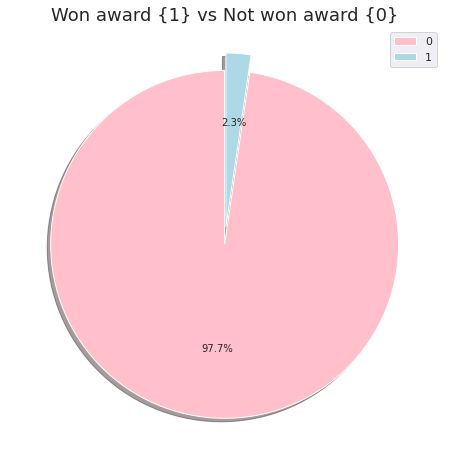

In [147]:
#Distribution of the awards won
#---
award=df1['awards_won?'].value_counts()
labels = [award.index[0], award.index[1]]
colors = ['pink', 'lightblue']
sizes = [award[0],award[1]]
explode =(0,0.1)
fig, ax1 = plt.subplots(figsize = (15,8))
ax1.pie(sizes,colors= colors,explode= explode, autopct='%.1f%%',shadow=True, startangle=90);
plt.title("Won award {1} vs Not won award {0}", fontsize = 18)
ax1.legend(labels, loc = "upper right")
plt.show()

2.3 %  of the employees won awards

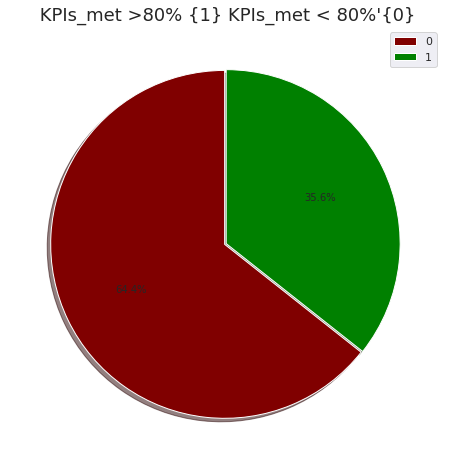

In [148]:
#distribution of the KPI below and above 80%
#---
kpi=df1['KPIs_met >80%'].value_counts()
labels = kpi.index
colors = ['maroon', 'green']
sizes = [kpi[0],kpi[1]]
explode =(0,0.01)
fig, ax1 = plt.subplots(figsize = (15,8))
ax1.pie(sizes,colors= colors,explode= explode, autopct='%.1f%%',shadow=True, startangle=90);
plt.title(" KPIs_met >80% {1} KPIs_met < 80%'{0}", fontsize = 18)
ax1.legend(labels, loc = "upper right")
plt.show()

employees perfomance seemes promising since 35.6% had KPI's greater than 80%

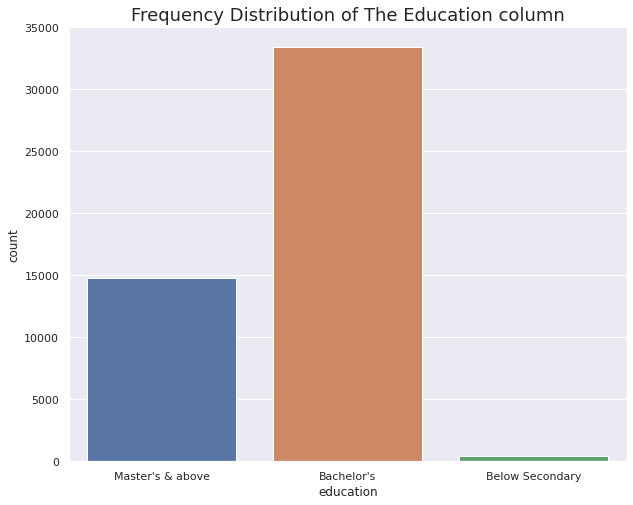

In [149]:
# Plotting the education column
#---
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="education", data=df1)
ax.set_title('Frequency Distribution of The Education column', fontsize=18)

plt.show()

majority of the employees had a bachelor's degree, followed by masters and above

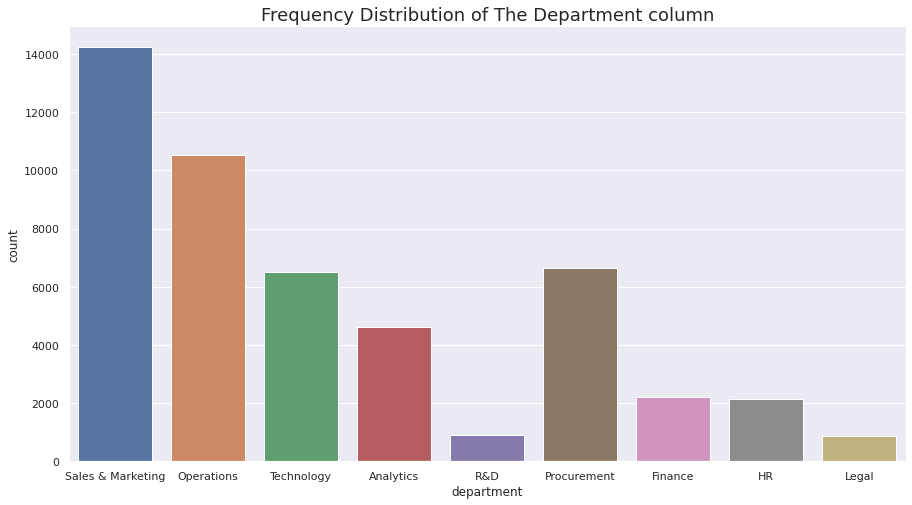

In [150]:
# Plotting the department column
#----
plt.figure(figsize=(15, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="department", data=df1)
ax.set_title('Frequency Distribution of The Department column', fontsize=18)
plt.show()

Sales and marketting department had the most employees followed by operations

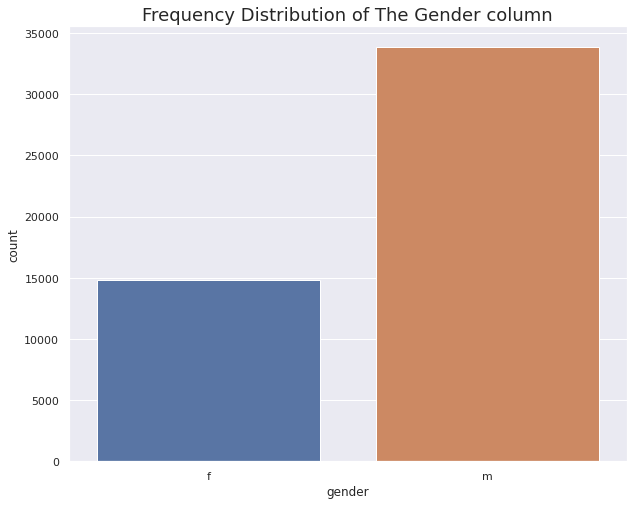

In [151]:
# Plotting the Gender column
#---
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="gender", data=df1)
ax.set_title('Frequency Distribution of The Gender column', fontsize=18)
plt.show()


there is a big disparity in gender since male employees were more than twice number of female employees


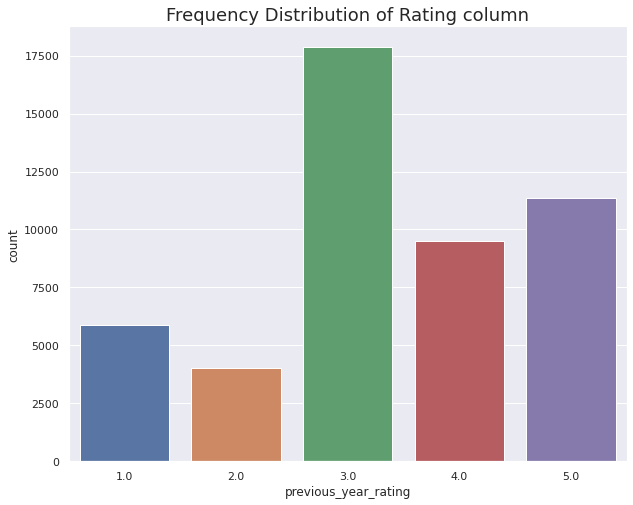

In [152]:
# Plotting the Rating column
#---
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="previous_year_rating", data=df1)
ax.set_title('Frequency Distribution of Rating column', fontsize=18)
plt.show()

majority of the employees had a rating of 3 followed closely by those who were rated 5

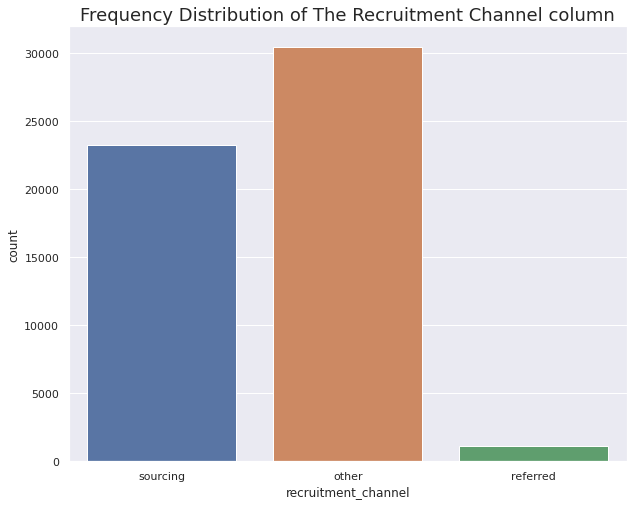

In [18]:
# Plotting the recruitment channel column
#---
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
ax = sns.countplot(x="recruitment_channel", data=df1)
ax.set_title('Frequency Distribution of The Recruitment Channel column', fontsize=18)
plt.show()

very few employees were recruited by referral

## Bivariate Analysis

In [19]:
df1.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

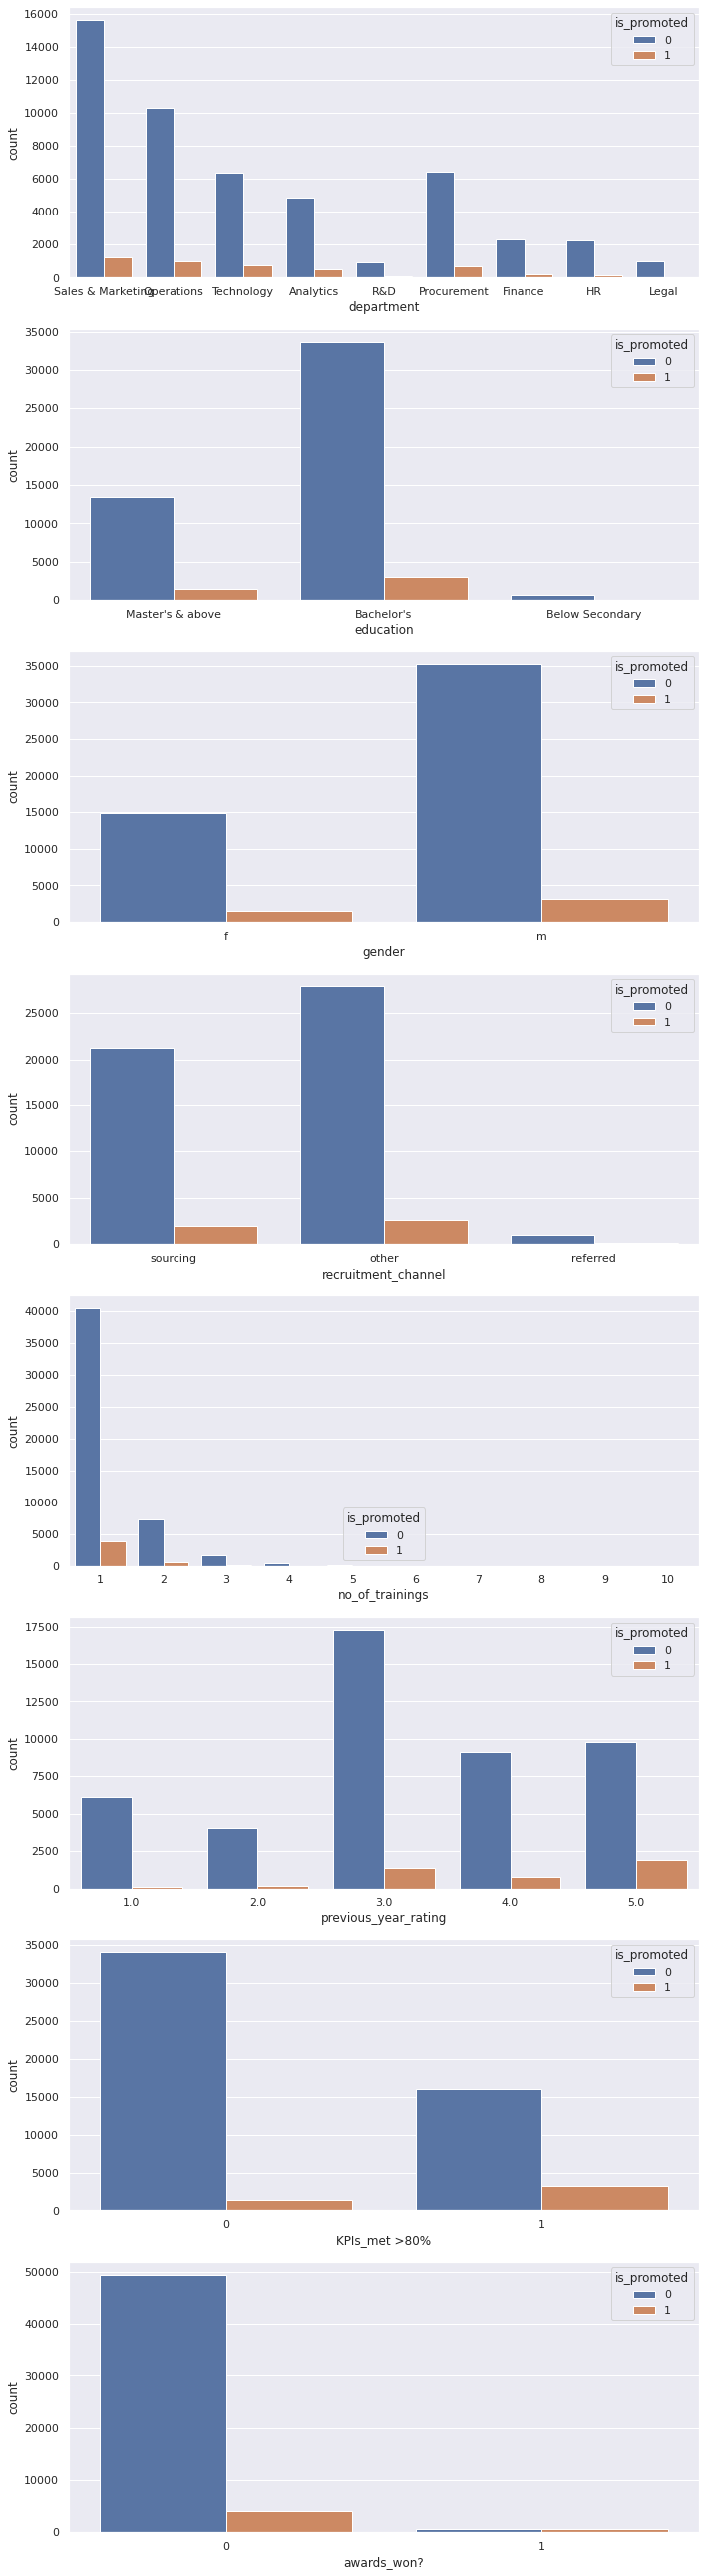

In [20]:
# Plotting the relationship between categorical variables and the target variable
cat_cols = ['department', 'education','gender',
       'recruitment_channel', 'no_of_trainings','previous_year_rating',
       'KPIs_met >80%', 'awards_won?']

plt.figure(figsize = (10,40))
for i in range(len(cat_cols)):
    plt.subplot(len(cat_cols)+1,1,i+1)
    sns.countplot(x = cat_cols[i], hue = 'is_promoted', data = df1)
plt.tight_layout()

between employees who worn 

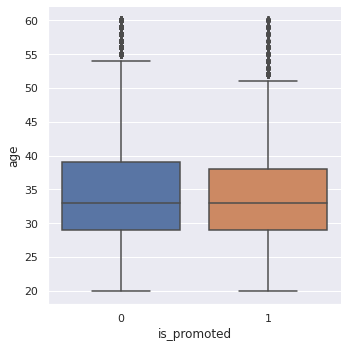

In [21]:
sns.catplot(x="is_promoted", y="age", kind="box", data=df1);

majority of the employees who were promoted were of the age 34

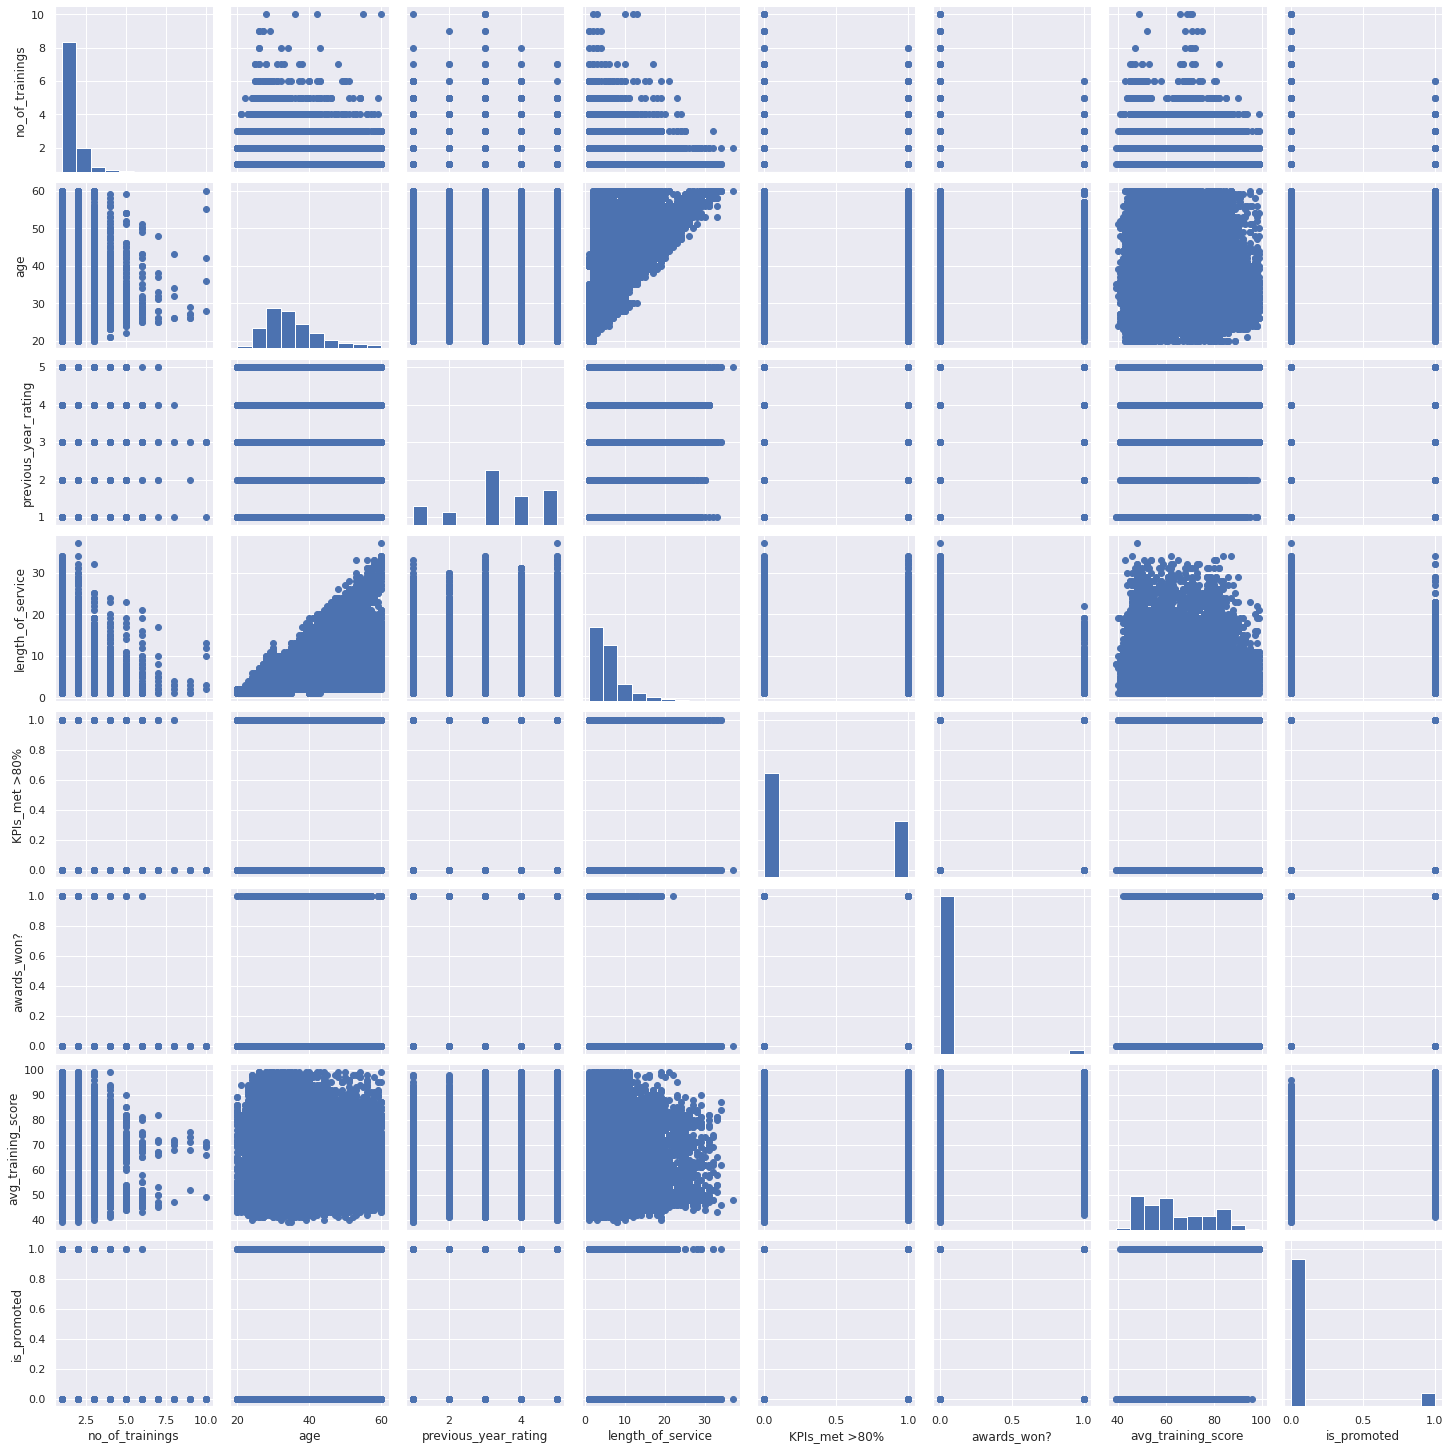

In [22]:
g = sns.PairGrid(data = df1, vars = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

<function matplotlib.pyplot.show>

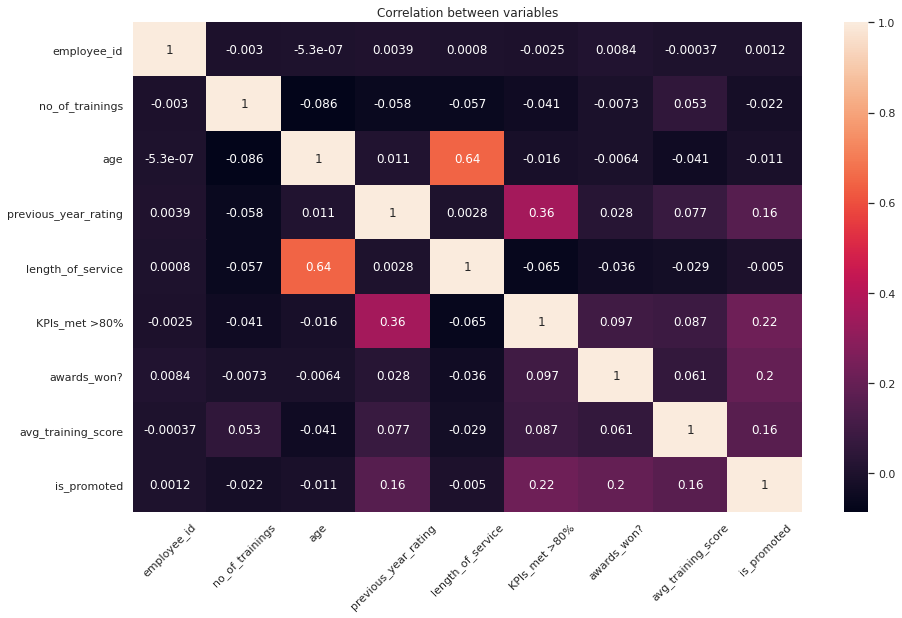

In [24]:

#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(15,9))
correlation_matrix=df1.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1132: RuntimeWarning: 

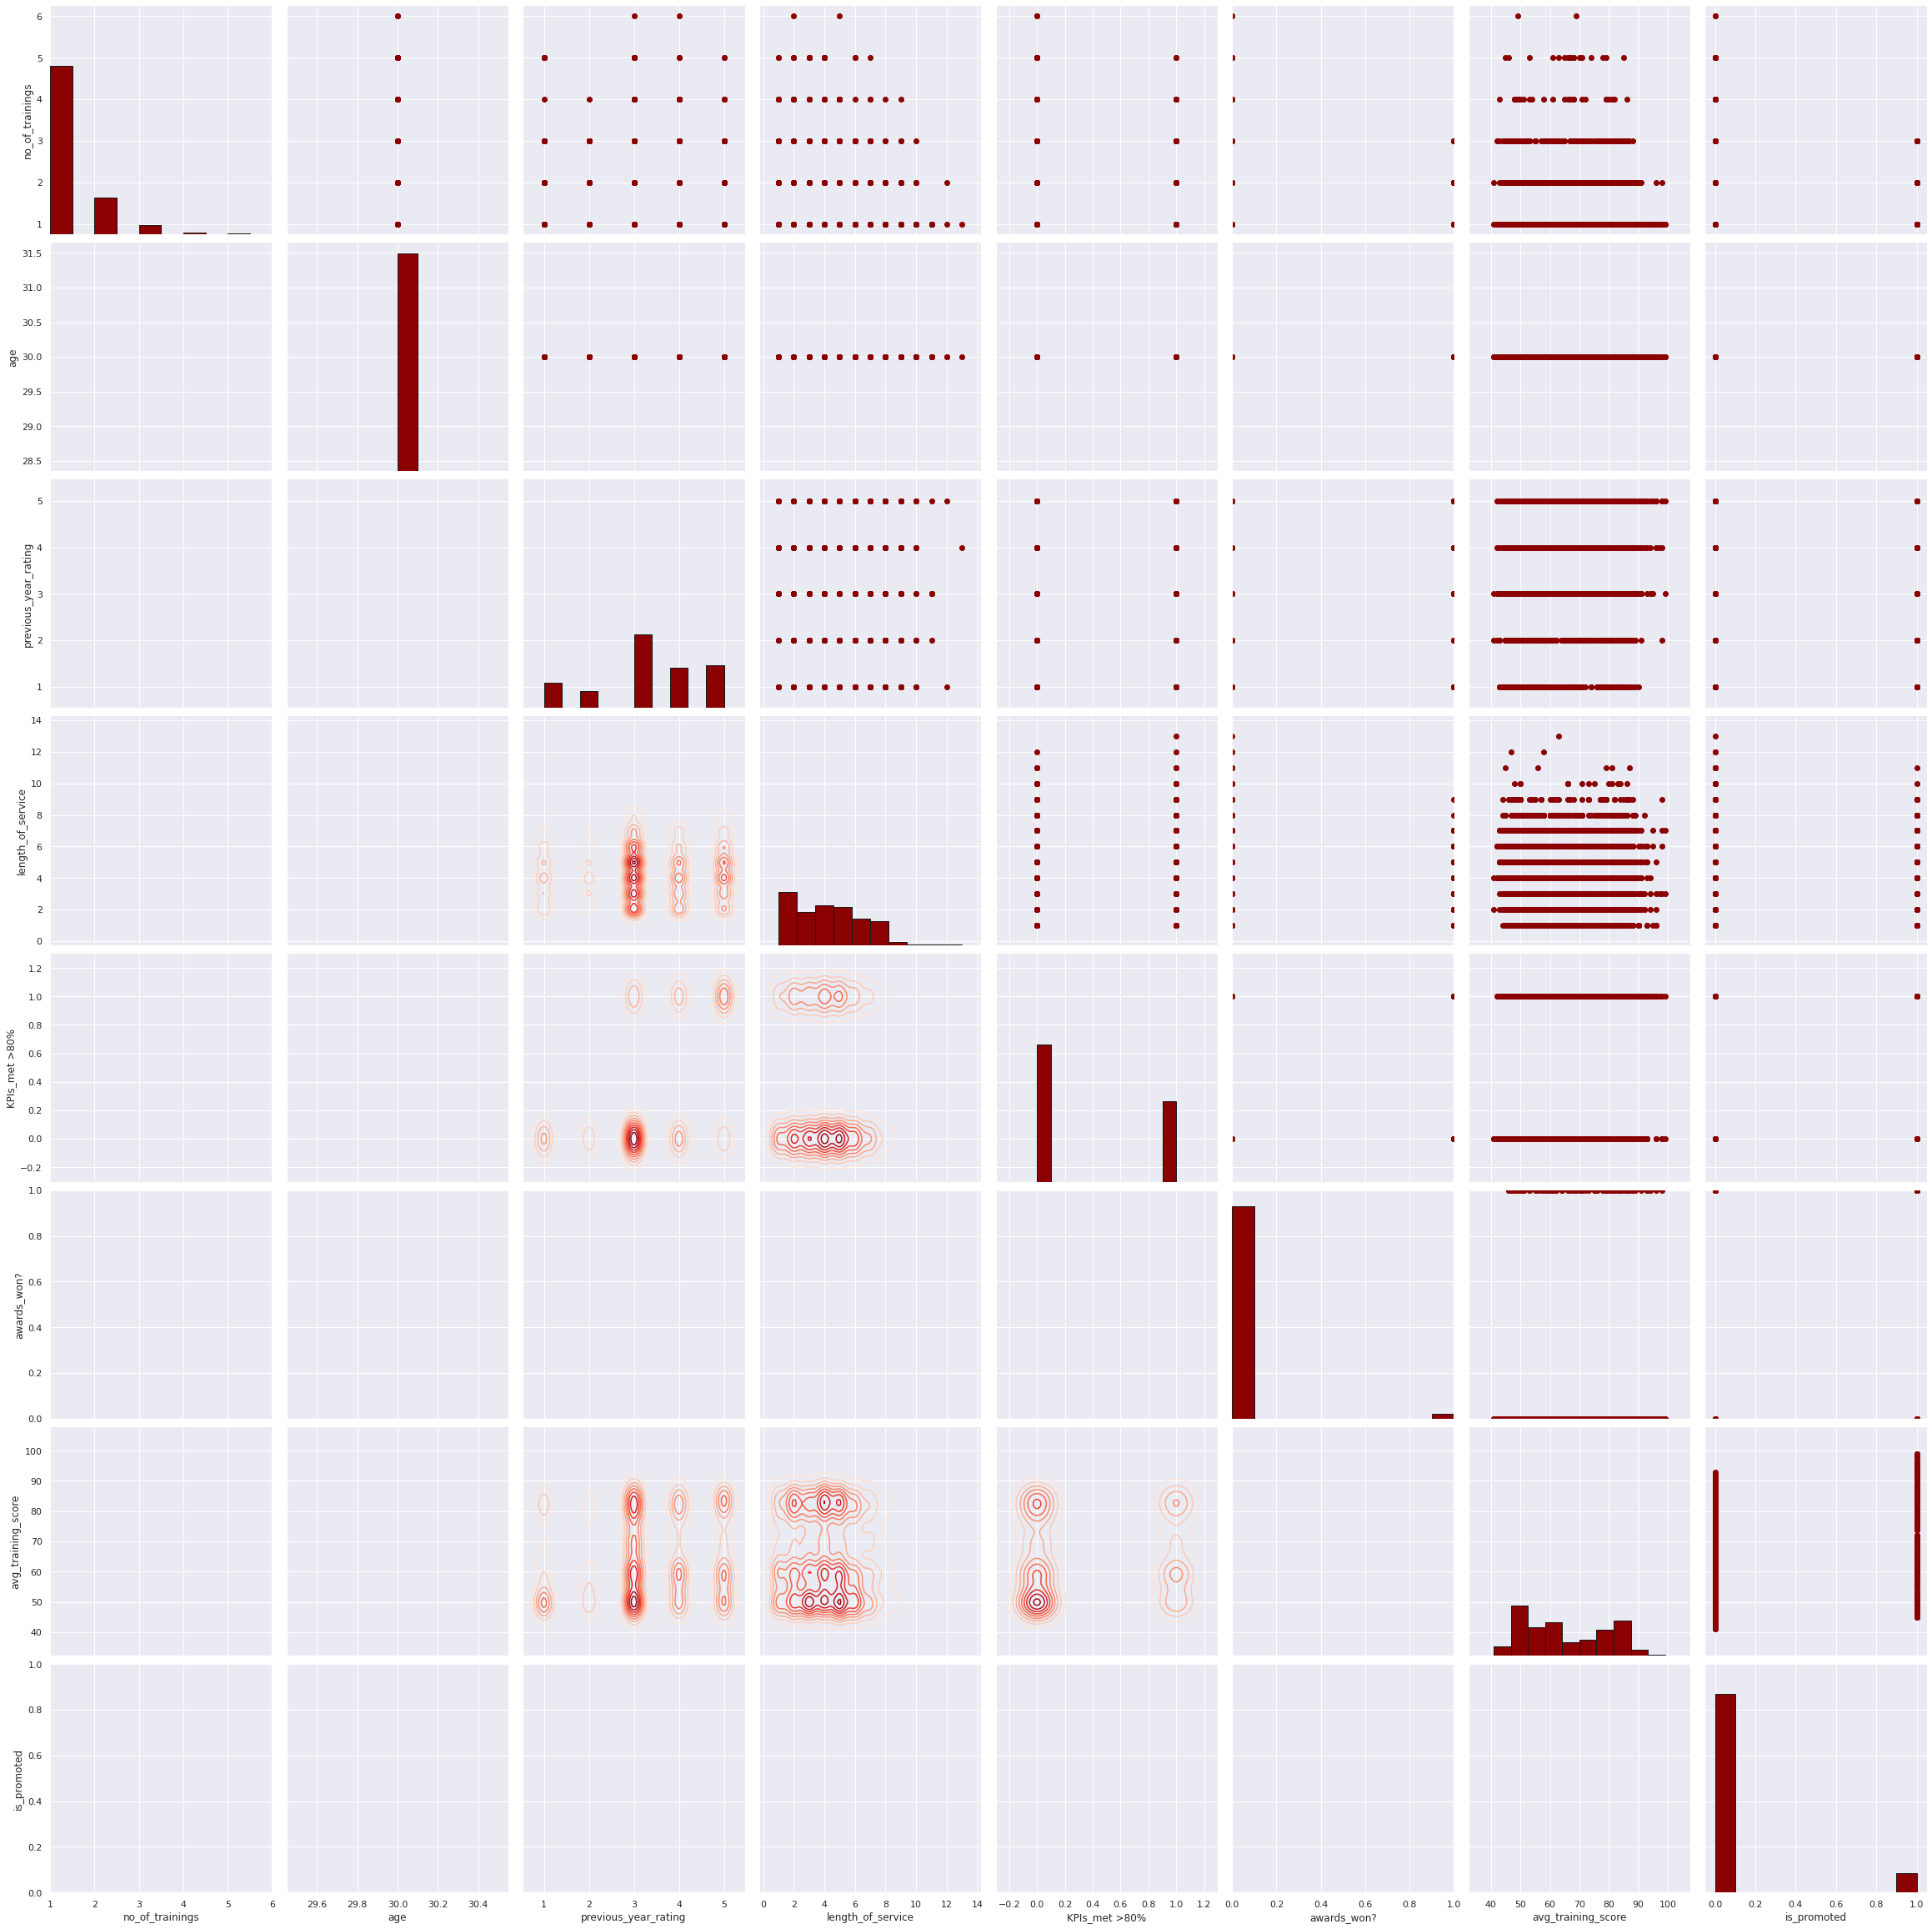

In [25]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df1[df1['age']==30],vars = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Mapping a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
# Mappping a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

## Observations from the univariate plots
> **1.Distribution**


> **2.Skewness**



>**3.Correlation**

From the heatmap there is moderate corerelation between:


>**4.Outliers/Abnomality**






In [26]:
df1.shape


(54808, 14)

In [ ]:
df1.columns

In [ ]:
df1.dtypes

## Encoding categorical columns

In [27]:
data = df1

In [ ]:
data.dtypes

In [28]:
# First we are going to covert our categorical data  to numerical data.
# Convert catergorical data to Numerical
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
data['department'] = en.fit_transform(data['department'])
data['region'] = en.fit_transform(data['region'])
data['education'] = en.fit_transform(data['education'])
data['gender'] = en.fit_transform(data['gender'])
data['recruitment_channel'] = en.fit_transform(data['recruitment_channel'])


data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [47]:
# Convert catergorical data to Numerical
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df0['department'] = en.fit_transform(df0['department'])
df0['region'] = en.fit_transform(df0['region'])
df0['education'] = en.fit_transform(df0['education'])
df0['gender'] = en.fit_transform(df0['gender'])
df0['recruitment_channel'] = en.fit_transform(df0['recruitment_channel'])


df0.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
1,74430,2,28,0,0,0,1,31,3.0,5,0,0,51
2,72255,7,4,0,1,0,1,31,1.0,4,0,0,47
3,38562,5,11,0,0,0,3,31,2.0,9,0,0,65
4,64486,1,21,0,1,2,1,30,4.0,7,0,0,61
5,46232,5,31,0,1,2,1,36,3.0,2,0,0,68


> ### Correlation Matrix

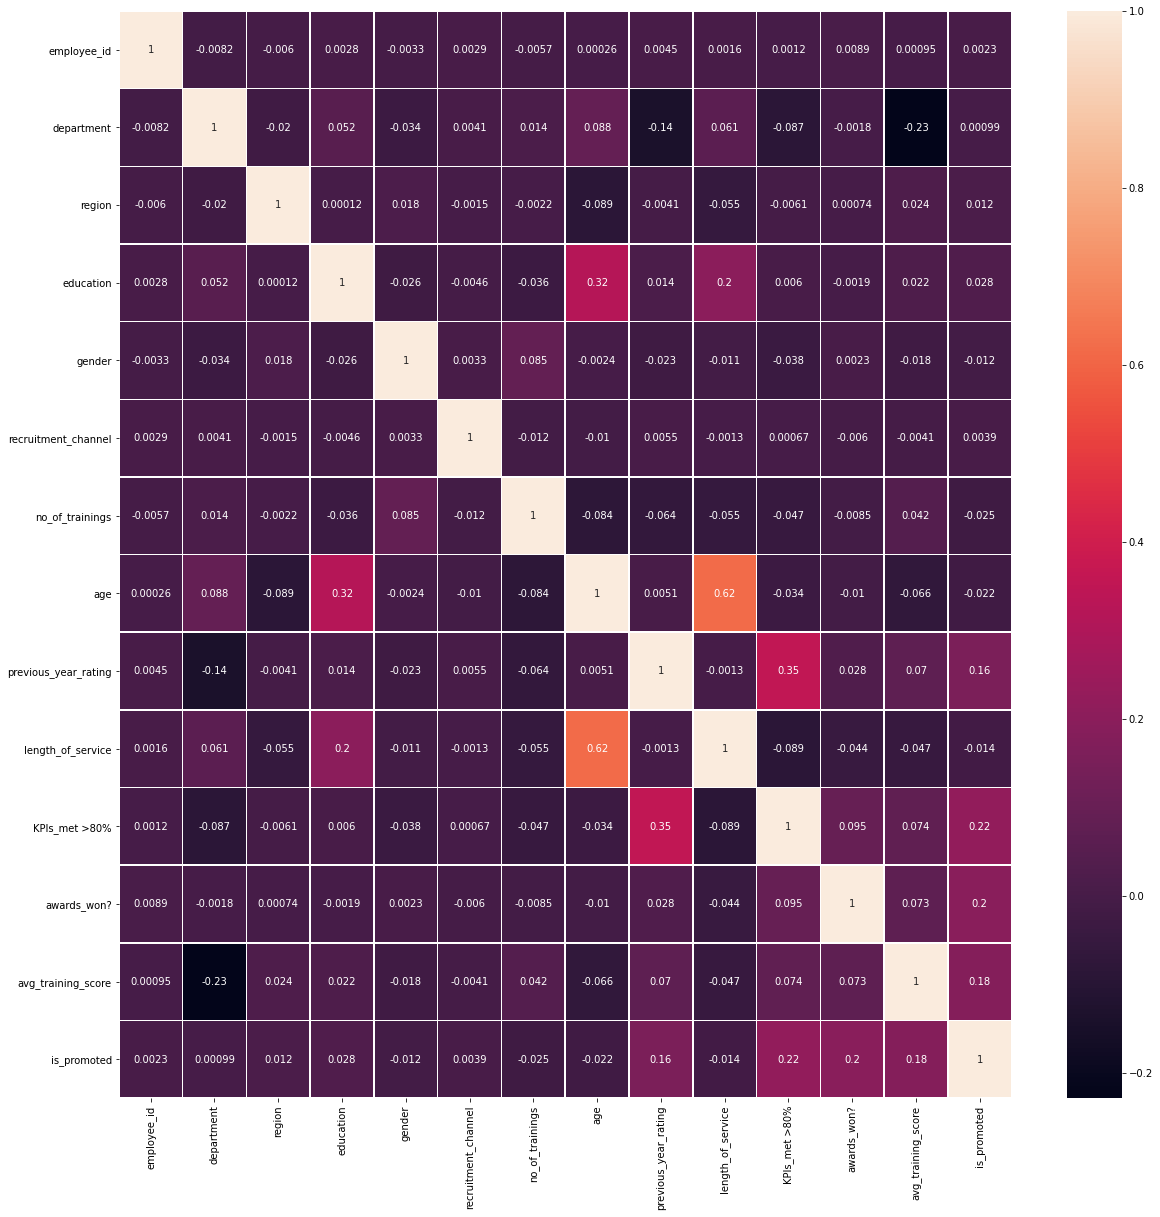

In [29]:
# Create a correlation matrix
corrMatrix = data.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

## Multivariate Analysis

In [ ]:
data.columns

In [30]:
# Linear Discreminant Analysis

# Separating our target label from the other features
feat= data.drop(['is_promoted', 'employee_id'], 1)
target = data['is_promoted']

feat

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2,0,2,1,35,5.0,8,1,0,49
1,4,14,0,1,0,1,30,5.0,4,0,0,60
2,7,10,0,1,2,1,34,3.0,7,0,0,50
3,7,15,0,1,0,2,39,1.0,10,0,0,50
4,8,18,0,1,0,1,45,3.0,2,0,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,7,5,0,1,0,2,31,1.0,2,0,0,49
54803,8,5,0,1,2,1,48,3.0,17,0,0,78
54804,4,19,2,0,0,1,37,2.0,6,0,0,56
54805,0,0,0,1,0,1,27,5.0,3,1,0,79


In [31]:

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(feat, target)
lda_feat = lda_.transform(feat)

# Display the coeficients of the reducted columns
lda_.coef_

array([[ 1.07809507e-01,  4.06811844e-03,  1.05329934e-01,
         3.12437825e-02,  1.71770321e-02, -1.22749298e-01,
        -1.98709671e-02,  2.94740389e-01,  2.79833322e-02,
         1.38691762e+00,  4.47063837e+00,  4.91850997e-02]])

In [32]:
# Since the coefficients are in an array, we needto create a dataframe so that we can extract the name of the columns
f_imp = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
awards_won?,4.470638
KPIs_met >80%,1.386918
previous_year_rating,0.294740
department,0.107810
education,0.105330
avg_training_score,0.049185
gender,0.031244
length_of_service,0.027983
recruitment_channel,0.017177
region,0.004068


#### **Recommendation**

From our analysis, it is safe to conclude that we can use  a linear combination of the following features to comfortably predict if an individual is likely to be promoted in the order respectively.


*   Awards won
*   KPIs_met>80%
*   Previous Year Rating
*   Department
*   Education
*   avg_training_score
*   Gender
*   Length of Service
*   Recuirtment channel
*   Region












## Implementing the Solution

### Multicollinearity check

In [34]:
# Focus here is on the independent variables only
independent_variables = data.drop(['is_promoted', 'employee_id'], 1)

# Let's display the correlations between the variables
a = independent_variables.corr()
a

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
department,1.000000,-0.019740,0.051576,-0.034020,0.004118,0.013762,0.088488,-0.141178,0.061436,-0.086974,-0.001781,-0.228819
region,-0.019740,1.000000,0.000123,0.017678,-0.001450,-0.002163,-0.088621,-0.004081,-0.054862,-0.006135,0.000745,0.023675
education,0.051576,0.000123,1.000000,-0.025717,-0.004603,-0.036427,0.321743,0.014437,0.202656,0.006002,-0.001853,0.021709
gender,-0.034020,0.017678,-0.025717,1.000000,0.003288,0.085456,-0.002446,-0.022828,-0.011082,-0.038172,0.002275,-0.017835
recruitment_channel,0.004118,-0.001450,-0.004603,0.003288,1.000000,-0.011872,-0.010308,0.005550,-0.001350,0.000669,-0.005999,-0.004137
no_of_trainings,0.013762,-0.002163,-0.036427,0.085456,-0.011872,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033
age,0.088488,-0.088621,0.321743,-0.002446,-0.010308,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214
previous_year_rating,-0.141178,-0.004081,0.014437,-0.022828,0.005550,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041
length_of_service,0.061436,-0.054862,0.202656,-0.011082,-0.001350,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461
KPIs_met >80%,-0.086974,-0.006135,0.006002,-0.038172,0.000669,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114


In [35]:
pd.DataFrame(np.linalg.inv(a.values), index = a.index, columns=a.columns)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
department,1.085122,0.009624,-0.041006,0.046178,-0.005671,-0.026667,-0.065038,0.126031,-0.005160,0.032800,-0.023373,0.236779
region,0.009624,1.009824,-0.032364,-0.018977,0.002414,0.012214,0.098899,0.003208,0.000675,0.010510,0.000521,-0.016306
education,-0.041006,-0.032364,1.121450,0.024426,0.001471,0.009922,-0.359050,-0.010215,-0.006741,-0.014515,0.003788,-0.055517
gender,0.046178,-0.018977,0.024426,1.012150,-0.004722,-0.086601,-0.026888,0.009986,0.018326,0.034197,-0.008031,0.028600
recruitment_channel,-0.005671,0.002414,0.001471,-0.004722,1.000446,0.012941,0.016729,-0.006309,-0.007743,0.000600,0.005860,0.002833
no_of_trainings,-0.026667,0.012214,0.009922,-0.086601,0.012941,1.022305,0.077770,0.052170,0.008478,0.030044,0.009622,-0.052100
age,-0.065038,0.098899,-0.359050,-0.026888,0.016729,0.077770,1.766231,-0.001810,-1.010616,-0.031711,-0.027334,0.060352
previous_year_rating,0.126031,0.003208,-0.010215,0.009986,-0.006309,0.052170,-0.001810,1.163575,-0.036405,-0.398106,0.006392,-0.027364
length_of_service,-0.005160,0.000675,-0.006741,0.018326,-0.007743,0.008478,-1.010616,-0.036405,1.642244,0.120742,0.050902,-0.000208
KPIs_met >80%,0.032800,0.010510,-0.014515,0.034197,0.000600,0.030044,-0.031711,-0.398106,0.120742,1.167511,-0.091854,-0.041375


From the heat map under bivariate analysis, the variables are not positively correlated or syrongly correlated. 



### Residual plots 

In [36]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = feat.values
y = target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for promotion based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# We then describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.00480326609157172

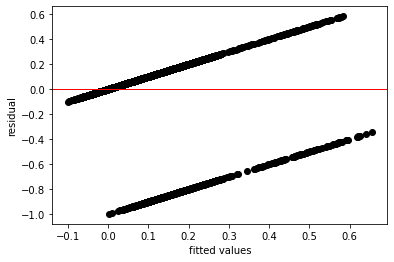

In [37]:
# Plotting the residuals

import matplotlib.pyplot as plt

plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Observation:

> ### Heteroskedasticity testing

In [38]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


This test normally establishes as a null hypothesis that the variance is equal or homogeneous for all the datapoints, and the new hypothesis that the variance is different or heterogeneous for at least one pair of datapoints.

From our outcome, we established the null hypothesis that the variance for all the datapoints are equal or homogeneous.

In [69]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [39]:
data['is_promoted'].value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

In [77]:
df0.drop('employee_id', axis = 1, inplace = True)

In [71]:
#drop employee id column
data.drop('employee_id', axis = 1, inplace = True)

In [72]:
y = data['is_promoted']
X = data.drop(['is_promoted'], axis = 1)
X_test = df0

In [73]:
#resampling the labelled data
#---
#
from imblearn.over_sampling import SMOTE

X_resample, y_resample  = SMOTE().fit_sample(X, y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(88856, 12)
(88856,)


In [74]:
# checking the value counts before and after sampling

print("Before Upsampling:")
print(y.value_counts())

print("Upsampled value counts :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Upsampling:
0    44428
1     4232
Name: is_promoted, dtype: int64
Upsampled value counts :
1    44428
0    44428
Name: 0, dtype: int64


In [75]:

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_resample, y_resample, test_size = 0.2, random_state = 101)

# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", X_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", X_test.shape)

Shape of the x Train : (71084, 12)
Shape of the y Train : (71084, 1)
Shape of the x Valid : (17772, 12)
Shape of the y Valid : (17772, 1)
Shape of the x Test : (20819, 13)


In [78]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

# lets print the shapes of these newly formed data sets
print("Shape of the x :", X.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", X_test.shape)

Shape of the x : (48660, 12)
Shape of the y : (48660,)
Shape of the x Test : (20819, 12)


## Decision Trees

Training Accuracy : 0.9999577964098812
Testing Accuracy : 0.9375984695025883


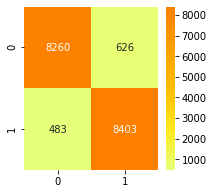

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

In [80]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8886
           1       0.93      0.95      0.94      8886

    accuracy                           0.94     17772
   macro avg       0.94      0.94      0.94     17772
weighted avg       0.94      0.94      0.94     17772



In [81]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [88]:

# Visualising the Decision Tree
# ---
#

ftr =['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']
      
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ftr)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('promotion decision tree.png')
Image(graph.create_png())

0 [label=<KPIs_met >80% &le; -1.074<br/>gini = 0.5<br/>samples = 71084<br/>value = [35542, 35542]>, fillcolor="#ffffff"] ;
  ^
Expected "}", found '['  (at char 124), (line:4, col:3)


AttributeError: ignored